# Экспериментальная проверка  центральной предельной теоремы

Центральная предельная теорема гласит, что распределение выборочных средних достаточно хорошо описывается нормальным распределением. При этом точность аппроксимации растет с увеличением объема выборки. Проверим это утверждение на примере бета-распределения, а также применим ее в решении одной интересной задачи про генератор случайных чисел.

### Бета-распределение
Сгенерируем выборку объёма 1000 из бета распределения с $\alpha = \beta = 0.5$:

https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D1%82%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
alpha = 0.5
beta = 0.5
beta_rv = sts.beta(a=alpha, b=beta)
# сгенерируем 1000 значений
sample = beta_rv.rvs(size=1000)

Гистограмма выборки и теоретическая плотность распределения:

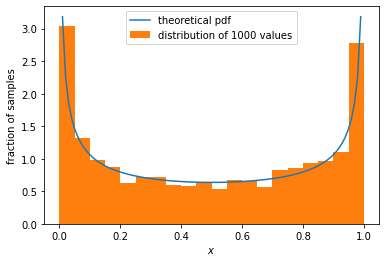

In [3]:
x = np.linspace(0,1,100)
pdf = beta_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')
plt.hist(sample, density=True, range=(0, 1), bins=20, label='distribution of 1000 values')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='upper center')

### Построим гистограммы распределений выборочных средних для объема выборок n=5, 10, 50, 100. 

### При этом количество выборочных средних будет всегда равно 1000.

Вычисление значений выборочных средних:

In [4]:
samples_5 = [] #списки выборок соответствующего объема
samples_10 = []
samples_50 = []
samples_100 = []
average_samples_5 = [] #списки выборочных средних
average_samples_10 = []
average_samples_50 = [] 
average_samples_100 = [] 

for i in range(1000):
    samples_5.append(beta_rv.rvs(size=5))
    samples_10.append(beta_rv.rvs(size=10))
    samples_50.append(beta_rv.rvs(size=50))
    samples_100.append(beta_rv.rvs(size=100))
    
for el in samples_5:
    average_samples_5.append(sum(el)/len(el))
for el in samples_10:
    average_samples_10.append(sum(el)/len(el))
for el in samples_50:
    average_samples_50.append(sum(el)/len(el))
for el in samples_100:
    average_samples_100.append(sum(el)/len(el))

Подсчет значений параметров нормальных распределений:

In [5]:
ex = alpha/(alpha+beta) # мат. ожидание
dx = (alpha*beta)/((alpha+beta+1)*(alpha+beta)**2) # дисперсия
dx_5 = dx/5 # дисперсия для n=5
dx_10 = dx/10 # дисперсия для n=10
dx_50 = dx/50 # дисперсия для n=50
dx_100 = dx/100 # дисперсия для n=100

Гистограмма выборочных средних для n=5 и сравнение с плотностью соответствующего нормального распределения

Text(0.5, 0, '$x$')

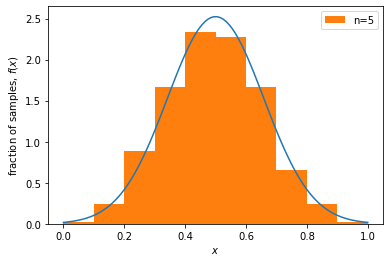

In [6]:
norm_rv = sts.norm(loc=ex, scale=dx_5**(0.5)) # передаем в функцию мат. ожидание и стандартное отклонение
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.hist(average_samples_5, density=True, range=(0, 1), label='n=5')
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')

Гистограмма выборочных средних для n=10 и сравнение с плотностью соответствующего нормального распределения

Text(0.5, 0, '$x$')

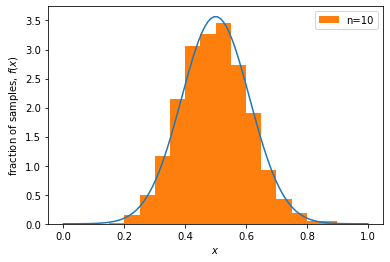

In [7]:
norm_rv = sts.norm(loc=ex, scale=dx_10**(0.5)) # передаем в функцию мат. ожидание и стандартное отклонение
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.hist(average_samples_10, density=True, range=(0, 1), bins = 20, label='n=10')
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')

Гистограмма выборочных средних для n=50 и сравнение с плотностью соответствующего нормального распределения

Text(0.5, 0, '$x$')

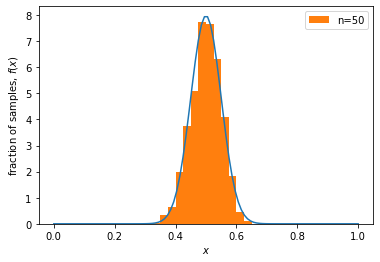

In [8]:
norm_rv = sts.norm(loc=ex, scale=dx_50**(0.5)) # передаем в функцию мат. ожидание и стандартное отклонение
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.hist(average_samples_50, density=True, range=(0, 1), bins = 40, label='n=50')
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')

Гистограмма выборочных средних для n=100 и сравнение с плотностью соответствующего нормального распределения

Text(0.5, 0, '$x$')

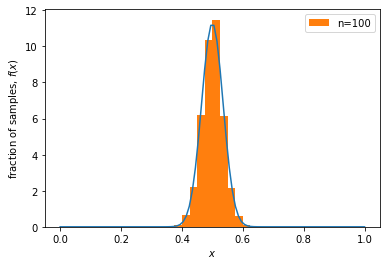

In [9]:
norm_rv = sts.norm(loc=ex, scale=dx_100**(0.5)) # передаем в функцию мат. ожидание и стандартное отклонение
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.hist(average_samples_100, density=True, range=(0, 1), bins = 40, label='n=100')
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')

## Выводы

В данном мини-исследовании была проведена проверка центральной предельной теоремы статистики для бета-распределения.
По графикам можно убедиться, что ЦПТ хорошо выполняется начиная с объема выборки n=50. Для объема выборки n=100 гистограмма и плотность распределения заменто сужается. Несмотря на то, что изначально функция данного распределения была смещена к краям интервала, точность аппроксимации выборочных средних для n=5 и n=10 всё равно остается неплохой, что лишь подтверждает справедливость ЦПТ статистики. Далее применим ее на практике.

# Постановка задачи

У Васи есть карточка, на которой написаны числа от 1 до N включительно. Также у Васи есть генератор случайных чисел (ГСЧ), который при каждом запуске равновероятно выдает число от 1 до N включительно. Вася играет в следующую игру: он запускает ГСЧ, смотрит, какое число ему выпало, и, если это число еще не было вычеркнуто, то Вася его вычёркивает. Игра заканчивается после того, как Вася вычеркнет все N цифр. Необходимо написать функцию F(N), которая на вход получает число N и в качестве результата выдает матожидание количества запусков ГСЧ, необходимых для того, чтобы вычеркнуть все N цифр на карточке.

## Часть 1 
### Математическое решение 

In [10]:
def Func(m,k): # вспомогательная функция для вычисления вероятности при n+k срабатывании ГСЧ
               # то есть она перемножает все вероятности в одном исходе и складывает с вероятностями 
               # других несовместных событий, общее количество всех слагаемых будет равно числу сочетаний из n+k-2 по k
    mas = [1] * k
    res = 1
    ch = 1
    count = 1
    while mas[k-1] != m:
        if mas[k-1] == ch:
            ch += 1
            mas = [1] * k
            mas[0] = ch
        else:
            ind = k
            for j in range(1, k):
                if mas[k-j] < mas[k-j-1]:
                    mas[k-j] += 1
                    ind = k - j + 1
                    break
            for j in range(ind,k):
                mas[j] = 1
        temp = 1
        for j in range(k):
            temp *= mas[j]
        res += temp
    return res

In [11]:
def F(n): # основная функция
    if n == 1:
        return 1
    p0 = 1
    for i in range(1, n):
        p0 *= (n-i)/n     # здесь считаем вероятность (p0) того, что ГСЧ выдаст все числа без повторений
    M = p0*n              # то есть p0*n будет стартовой точкой (первым слагаемым) для вычисления мат. ожидания
    k = 0    # переменная для наращивания кол-ва срабатываний ГСЧ после n-го срабатывания
    p_k = p0 # переменная для значения вероятности при n+k срабатывании ГСЧ
    delta = 0.0001    # предельное значение одного из слагаемых мат. ожидания. ГСЧ может довольно долго не выдавать 
                      # какое-то число, но вероятность не выдать это число падает с каждым срабатыванием. 
                      # Поэтому чтобы не вычислять мат. ожидание бесконечно, зададим точность вычисления. 
                      # Вообще, конечно, здесь можно долго экспериментировать для оптимального значения delta
                      # в сравнении к затраченному времени вычисления, на данном этапе ограничимся 0.0001.
    while p_k*(n+k) >= delta:  
        k += 1
        p_temp = p0/(n**k) # постоянный множитель в вероятности, который учитывает положительные исходы срабатывания ГСЧ
                           # знаменатель n^k при неправильных срабатываниях также вынесен за скобку
        p_k = p_temp * Func(n-1, k)
        M += p_k*(n+k)
    return M            

In [12]:
# мат. ожидание для n = 5, для больших значений n следует снижать точность, т.к. время расчета существенно увеличивается
F(5)

11.416262087862505

## Часть 2
### Вычисление мат. ожидания с помощью экспериментальной симуляции

In [13]:
# функция, которая вычисляет F(n) экспериментально
import random
def Fexp(n):
    k = 0 # счетчик срабатываний ГСЧ
    s = set() # множество для хранения всех чисел
    for i in range(1, n+1): # заполняем множество
        s.add(i)
    while s: # пока в множестве есть хотя бы один элемент
        temp = random.randint(1,n) # генерируем число и прибавляем счетчик
        k += 1
        if temp in s: # если число есть в множестве, то удаляем его
            s.remove(temp) 
    return k

In [14]:
k = 10000        # возьмем выборку из десяти тысяч игр
m = 500          # количество выборочных средних
n = 5            # n - количество чисел в игре
lst = []         # список для хранения одной выборки
all_lst = []     # список для хранения всех выборок
average_lst = [] # список для хранения выборочных средних
for i in range(m):
    lst = []
    for i in range(k):
        lst.append(Fexp(n))
    all_lst.append(lst)
for el in all_lst:
    myarray = np.array(el)
    mean = round(myarray.mean(),2)
    average_lst.append(mean)
average_array = np.array(average_lst)
average_mean = round(average_array.mean(),2) # среднеее значение из всех выборочных средних
std = round(average_array.std(ddof=1),2)     # несмещенное стандартное отклонение
z = 1.96   # критическое значение стандартного нормального распределения для уровня значимости 0.05
left_border = round(average_mean - z * std / math.sqrt(m),2)
right_border = round(average_mean + z * std / math.sqrt(m),2)
print('При количестве игр ',k,' ',n,' числах в игре и ',m,' выборочных средних, среднее значение составляет: ',
      average_mean, ', стандартное отклонение: ', std,
      '\nМатематическое ожидание из генеральной совокупности с вероятностью 95% попадает в интервал [',
      left_border,' ; ',right_border,']', sep='')

При количестве игр 10000 5 числах в игре и 500 выборочных средних, среднее значение составляет: 11.42, стандартное отклонение: 0.05
Математическое ожидание из генеральной совокупности с вероятностью 95% попадает в интервал [11.42 ; 11.42]


Визуализируем распределение всех выборочных средних и соответствующее ему нормальное распределение.

Text(0.5, 0, '$x$')

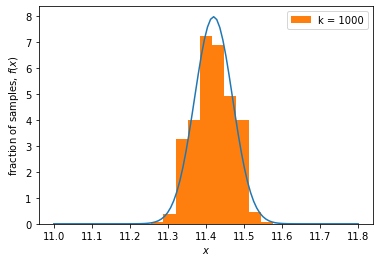

In [15]:
norm_rv = sts.norm(loc=average_mean, scale=std) # передаем в функцию мат. ожидание и стандартное отклонение
x = np.linspace(11,11.8,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.hist(average_lst, density=True, range=(11,11.8), label='k = 1000', bins = 25)
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')

При этом нам абсолютно не важно исходное распределение количества срабатываний ГСЧ, которое ограничено снизу числом n и смещено влево

Text(0.5, 0, '$x$')

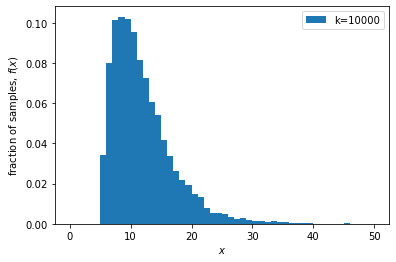

In [16]:
plt.hist(lst, density=True, range=(0,50), label='k=10000', bins = 50)
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')

Такую выборку можно хорошо описать гамма-распределением. Ради практического интереса подберем параметры этого распределения и построим его график.

Text(0.5, 0, '$x$')

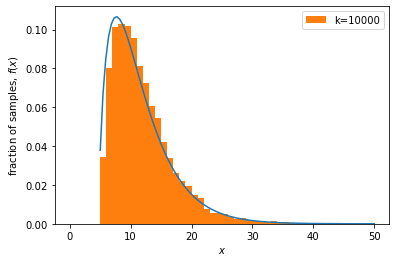

In [17]:
fit_alpha, fit_loc, fit_beta=sts.gamma.fit(lst)
gamma = sts.gamma(fit_alpha, loc=fit_loc, scale=fit_beta)
x = np.linspace(5,50,100)
pdf = gamma.pdf(x)
plt.plot(x, pdf)
plt.hist(lst, density=True, range=(0,50), label='k=10000', bins = 50)
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')

## Выводы

Видно, что ответы в строгом математическом решеним и экспериментальной симуляции совпадают. При этом выборка из количества срабатываний ГСЧ ограничена снизу числом n. Независимо от того, что исходное распределение сильно смещено влево, все выборочные средние при достаточно больших выборках всё равно подчиняются закону нормального распределения.